# Paper image generation
Notebook with the images used on the paper.

## Imports


In [8]:
import warnings
import numpy as np
import os
import random
import sys
sys.path.insert(0, "..")

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from tqdm import tqdm

import src.utils.data_extraction as extractions
import src.utils.dtw as dtw
import src.models.augmentations as augmentations
import src.visualization.visualize as visualize

warnings.filterwarnings('ignore')

## Data Import

In [9]:
timeSeries = pd.read_json('../data/processed/processed_time_series.json', orient='records', lines=True)
timeSeries.head()

,class,file_path,exam,cop_x,cop_y,flag,acc_x,acc_y,rms_acc_x,rms_acc_y,...,f80_x,f80_y,mf_lf_x,mf_lf_y,mf_mf_x,mf_mf_y,mf_hf_x,mf_hf_y,rms_x,rms_y
0,Healthy,../data/raw/COP_Tests/HG\participant_21\OASETD...,OASETD,"[-0.5907142773, -0.5830138725, -0.568375171700...","[0.2712757557, 0.2322967262, 0.2001411492, 0.1...",real,"[0.0, 0.19251012180000002, 0.3659675177, 0.641...","[0.0, -0.9744757362, -0.8038894263, -0.5128178...",0.275944,1.017366,...,193.615346,453.199431,11.402748,26.146214,3.098147,9.071309,0.876182,0.822447,0.174228,0.443474
1,Healthy,../data/raw/COP_Tests/HG\participant_21\OASE_S...,OASE,"[-0.1216296082, -0.1255443063, -0.1220796319, ...","[0.2382965813, 0.1902104963, 0.1435632476, 0.0...",real,"[0.0, -0.0978674528, 0.08661685820000001, 0.09...","[0.0, -1.2021521243, -1.1661812174, -1.1642681...",0.348282,1.094997,...,154.466090,424.615996,10.249035,20.396859,2.652427,9.220760,0.275486,1.254465,0.146995,0.347908
2,Healthy,../data/raw/COP_Tests/HG\participant_21\OASITD...,OASITD,"[-0.1673141316, -0.1617796703, -0.1517826153, ...","[0.8381318585, 0.9215735610000001, 1.008309293...",real,"[0.0, 0.1383615326, 0.2499263746, 0.5865120819...","[0.0, 2.0860425636, 2.1683932987, 2.1825133877...",0.584157,1.367482,...,221.181984,792.630826,12.012784,50.680674,4.606157,12.561370,0.454124,2.678517,0.157215,0.594472
3,Healthy,../data/raw/COP_Tests/HG\participant_21\OCSETD...,OCSETD,"[-0.0249518425, -0.0183494472, -0.0160548979, ...","[0.5626136740000001, 0.5075073804, 0.464026374...",real,"[0.0, 0.1650598826, 0.0573637322, -0.007285961...","[0.0, -1.3776573393, -1.0870251509, -1.0105456...",0.330530,1.242923,...,119.803139,487.840236,6.199874,26.488442,2.494176,9.817008,0.323247,1.260141,0.080185,0.369688
4,Healthy,../data/raw/COP_Tests/HG\participant_21\OCSE_S...,OCSE,"[0.030813172200000002, 0.03789838, 0.046175301...","[0.132542597, 0.1070391026, 0.094200087, 0.070...",real,"[0.0, 0.17713019430000002, 0.2069230273, -0.00...","[0.0, -0.6375873588000001, -0.3209753906, -0.5...",0.408705,1.535297,...,169.824356,673.075707,11.367458,38.918436,2.797528,13.425002,0.367001,1.235255,0.140936,0.563218


## Temporal series by axis NO-AUG
Temporal series X axis of the Center of Pressure

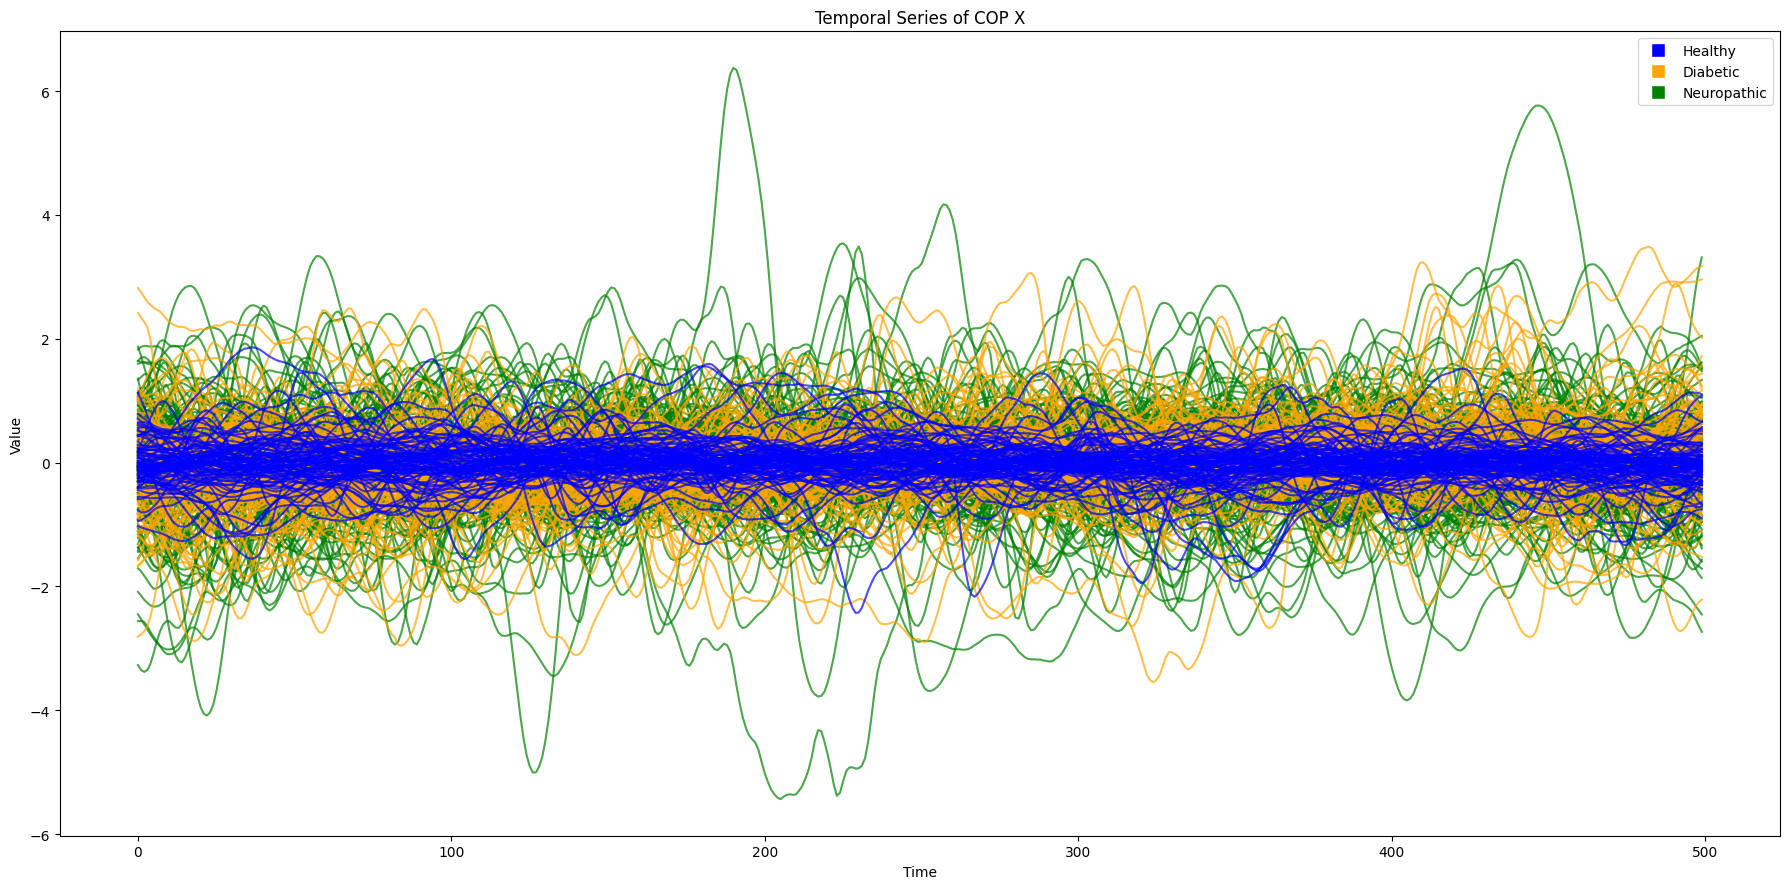

In [10]:
colors = {'Neuropathic': 'green', 'Diabetic': 'orange', 'Healthy': 'blue'}

class_series = {'Neuropathic': [], 'Diabetic': [], 'Healthy': []}

for index, row in timeSeries.iterrows():
    class_label = row['class']
    class_series[class_label].append(row[['cop_x', 'cop_y']])
fig, ax = plt.subplots(figsize=(18, 9))

class_order = ['Neuropathic', 'Diabetic', 'Healthy']

for class_label in class_order:
    class_data = class_series[class_label]
    for data in class_data:
        x_series, _ = data
        color = colors[class_label]
        ax.plot(x_series, label=class_label, color=color, alpha=0.7)

ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.set_title('Temporal Series of COP X')
legend_elements = [Line2D([0], [0], marker='s', color='w', label='Healthy', markerfacecolor='blue', markersize=10),
                   Line2D([0], [0], marker='s', color='w', label='Diabetic', markerfacecolor='orange', markersize=10),
                   Line2D([0], [0], marker='s', color='w', label='Neuropathic', markerfacecolor='green', markersize=10)]
ax.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

Temporal series X axis of the Center of Pressure

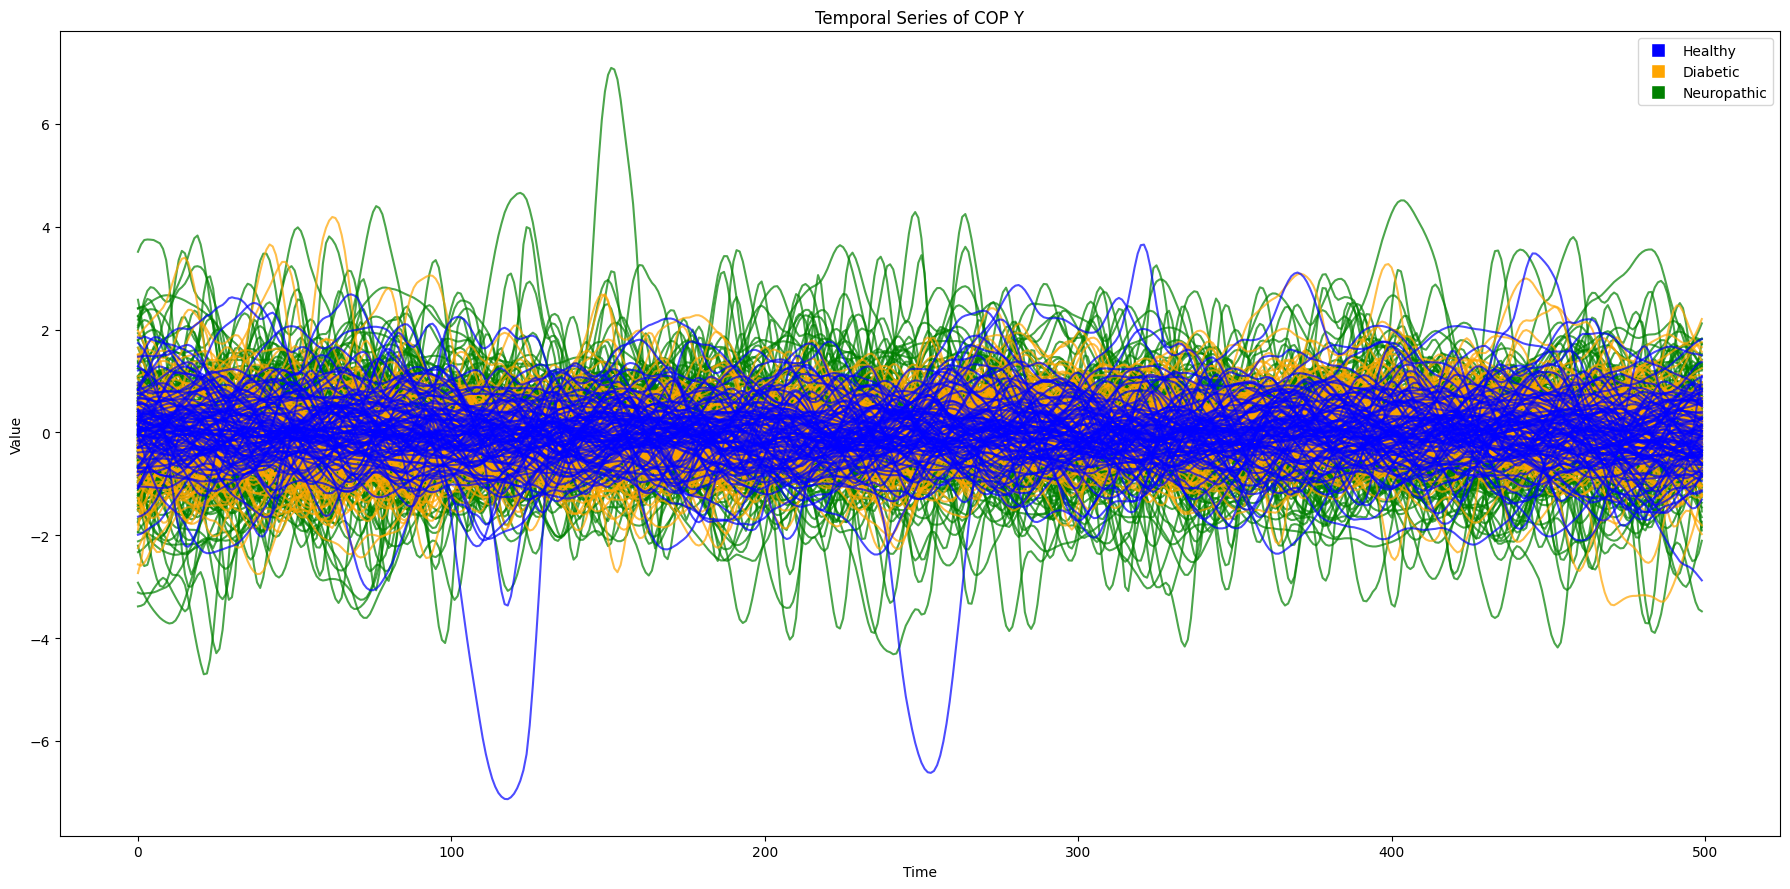

In [11]:
fig, ax = plt.subplots(figsize=(18, 9))

for class_label in class_order:
    class_data = class_series[class_label]
    for data in class_data:
        _, y_series = data
        color = colors[class_label]
        ax.plot(y_series, label=class_label, color=color, alpha=0.7)

ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.set_title('Temporal Series of COP Y')
legend_elements = [Line2D([0], [0], marker='s', color='w', label='Healthy', markerfacecolor='blue', markersize=10),
                   Line2D([0], [0], marker='s', color='w', label='Diabetic', markerfacecolor='orange', markersize=10),
                   Line2D([0], [0], marker='s', color='w', label='Neuropathic', markerfacecolor='green', markersize=10)]
ax.legend(handles=legend_elements)

plt.tight_layout()
plt.show()


## Box Plot of temporal series NO-AUG

Box plot of the X axis of the Center of Pressure separated by class

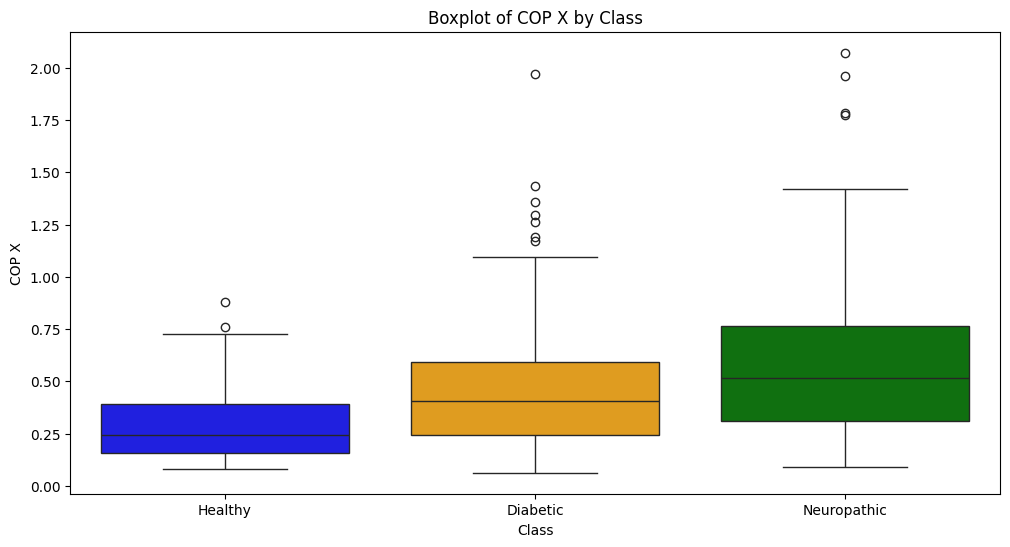

In [12]:
colors = {'Neuropathic': 'green', 'Diabetic': 'orange', 'Healthy': 'blue'}
class_series = {'Neuropathic': [], 'Diabetic': [], 'Healthy': []}

class_series_x = {'Neuropathic': [], 'Diabetic': [], 'Healthy': []}
class_series_y = {'Neuropathic': [], 'Diabetic': [], 'Healthy': []}
data = []

for class_label, series in class_series.items():
    for data_point in series:
        cop_x, _ = data_point
        for value in cop_x:
            data.append({'cop_x': value, 'class': class_label})


plt.figure(figsize=(12, 6))
sns.boxplot(x='class', y='rms_x', data=timeSeries, palette=colors)

plt.xlabel('Class')
plt.ylabel('COP X')
plt.title('Boxplot of COP X by Class')

plt.savefig('../reports/figures/boxplot_cop_x.png', dpi=300)

plt.show()

Box plot of both axis of the Center of Pressure separated by class

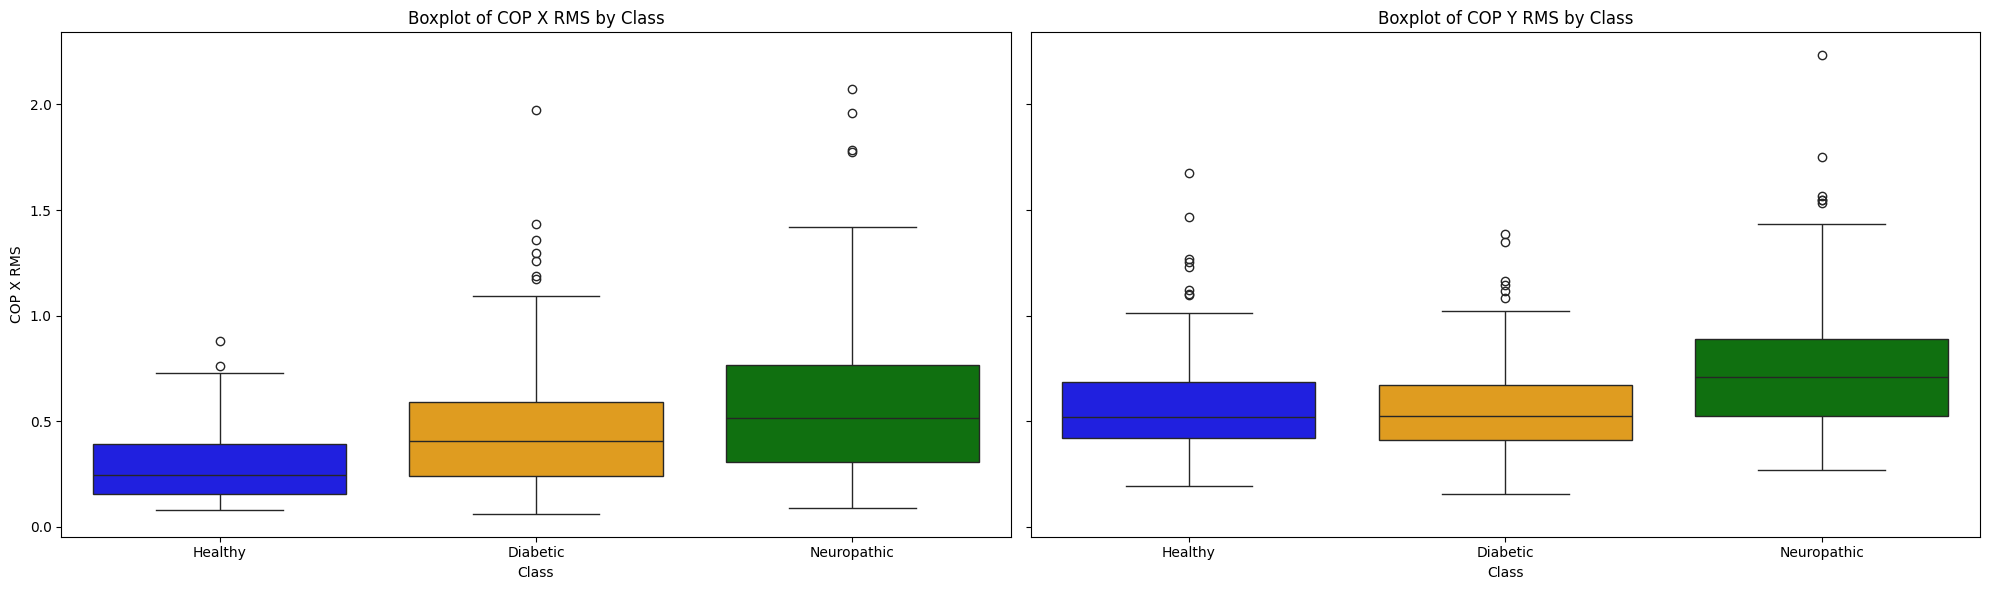

In [13]:
palette = {'Healthy': 'blue', 'Diabetic': 'orange', 'Neuropathic': 'green'}

fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

sns.boxplot(x='class', y='rms_x', data=timeSeries, palette=palette, ax=axs[0])
axs[0].set_title('Boxplot of COP X RMS by Class')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('COP X RMS')

sns.boxplot(x='class', y='rms_y', data=timeSeries, palette=palette, ax=axs[1])
axs[1].set_title('Boxplot of COP Y RMS by Class')
axs[1].set_xlabel('Class')
axs[1].set_ylabel('COP Y RMS')

plt.tight_layout()

plt.show()

Box plot of the Y axis of the Center of Pressure separated by class

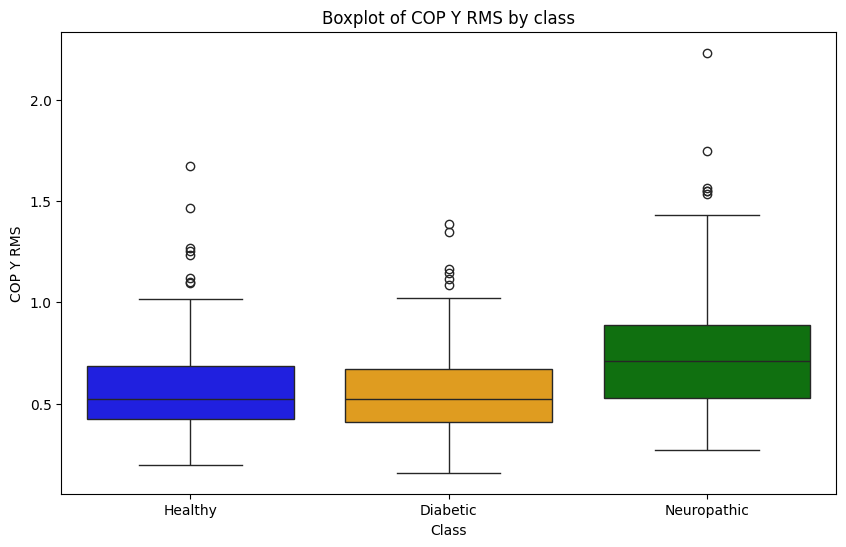

In [14]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='rms_y', data=timeSeries, palette=palette)

plt.title('Boxplot of COP Y RMS by class')
plt.xlabel('Class')
plt.ylabel('COP Y RMS')
plt.show()
